# Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Data

In [2]:
data1=sns.load_dataset("taxis")

In [3]:
data1.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


**1.Basic information about data - EDA**

In [4]:
data1.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [6]:
data1.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


**2. Duplicate values**

In [7]:
data1.duplicated().sum()

0

**3. Unique values in the data**


In [8]:
data1['passengers'].unique()


array([1, 3, 0, 6, 5, 2, 4])

In [9]:
data1['payment'].unique()

array(['credit card', 'cash', nan], dtype=object)

In [10]:
data1['pickup'].unique()

array(['2019-03-23 20:21:09', '2019-03-04 16:11:55',
       '2019-03-27 17:53:01', ..., '2019-03-23 22:55:18',
       '2019-03-04 10:09:25', '2019-03-13 19:31:22'], dtype=object)

**Visualize the Unique counts**

/Users/sheelendersharma1/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[]

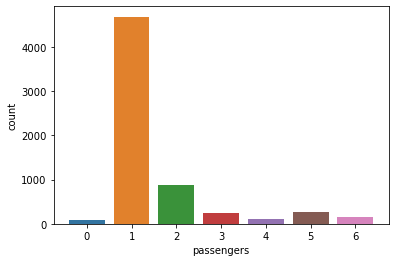

In [11]:
sns.countplot(data1['passengers'])
plt.plot()

$$Obeservation$$

- Most of rides for 1 passenger
- least of rides for 0,4 passenger

**5. Find the Null values**

In [12]:
data1.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [13]:
cat_cols=data1.columns[data1.dtypes=='O']
num_cols=data1.columns[(data1.dtypes=='int64')|(data1.dtypes=='float64')]

In [14]:
cat_cols

Index(['pickup', 'dropoff', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [15]:
num_cols

Index(['passengers', 'distance', 'fare', 'tip', 'tolls', 'total'], dtype='object')

In [16]:
data1[num_cols].isnull().sum()

passengers    0
distance      0
fare          0
tip           0
tolls         0
total         0
dtype: int64

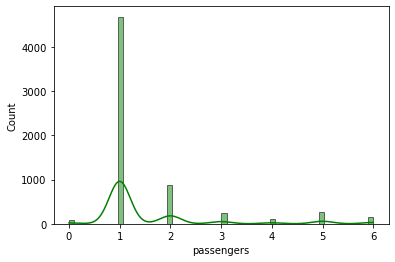

In [17]:
sns.histplot(data=data1['passengers'],kde=True,color='g') # seaborn
# kde=kernel density estimation
plt.show()

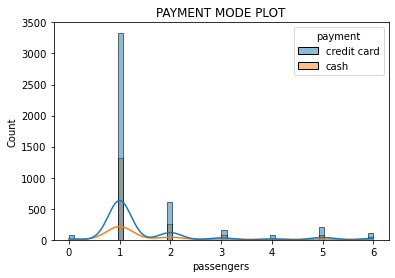

In [18]:
sns.histplot(data=data1,x='passengers',kde=True,hue='payment')
plt.title("PAYMENT MODE PLOT")
plt.show()

# Analysing on Earning

In [19]:
Fare=data1['fare'].sum()
print("Total Fare:",Fare)

Total Fare: 84214.87


In [20]:
Average=data1['fare'].median()
print("Average is:",Average)

Average is: 9.5


*Outliner*

In [23]:
Q1=np.quantile(data1['fare'],0.25)
Q2=np.quantile(data1['fare'],0.5)
Q3=np.quantile(data1['fare'],0.75)
print("0.25 quantile of fare value is",Q1)
print("0.5 quantile of fare value is",Q2)
print("0.75 quantile of fare value is",Q3)

0.25 quantile of fare value is 6.5
0.5 quantile of fare value is 9.5
0.75 quantile of fare value is 15.0


In [24]:
IQR=Q3-Q1
print('IQR is :',IQR)

IQR is : 8.5


In [27]:
l_b=Q1-1.5*IQR
u_b=Q3+1.5*IQR
print("Lower bound is :",l_b)
print("Upper bound is :",u_b)

Lower bound is : -6.25
Upper bound is : 27.75


In [32]:
outliner_age=data1[(data1['fare']>u_b)|(data1['fare']<l_b)]['fare'].values
outliner_age


array([ 31.5 ,  80.  ,  28.  ,  29.5 ,  36.  ,  52.  ,  30.  ,  33.5 ,
        30.  ,  39.5 ,  37.61,  36.  ,  34.  ,  29.5 ,  52.  ,  28.5 ,
        52.  ,  39.5 ,  40.  ,  46.5 ,  48.5 ,  28.  ,  32.  ,  52.  ,
        29.5 ,  28.  ,  36.  ,  38.5 ,  40.5 ,  52.  ,  52.  ,  52.  ,
        50.5 ,  35.5 ,  45.  ,  52.  ,  52.  ,  36.5 ,  35.5 ,  30.5 ,
        33.  ,  28.5 ,  29.5 ,  37.58,  36.  ,  32.  ,  34.  ,  28.  ,
        37.  ,  47.5 ,  31.  ,  28.  ,  41.53, 120.  ,  28.  ,  52.  ,
        28.5 ,  33.  ,  52.  ,  32.5 ,  44.  ,  33.  ,  35.5 ,  31.5 ,
        49.  ,  52.  ,  30.5 ,  52.  ,  52.  ,  52.  ,  57.  ,  52.  ,
        40.  ,  38.  ,  31.5 ,  35.5 ,  34.  ,  29.5 ,  52.  ,  30.5 ,
        45.  ,  52.  ,  28.5 ,  28.  ,  52.  ,  52.  ,  52.  ,  52.  ,
        39.  ,  52.  ,  32.5 ,  31.  ,  52.  ,  29.  ,  52.  ,  32.  ,
        52.  ,  42.  ,  30.5 ,  28.5 ,  38.  ,  52.  ,  29.  ,  31.  ,
        28.5 ,  49.5 ,  52.  ,  29.5 ,  28.  ,  32.  ,  29.  ,  31.5 ,
      

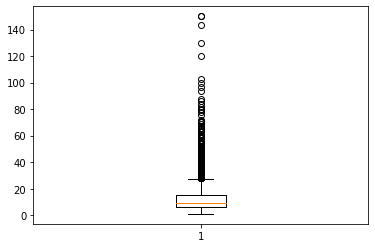

In [33]:
plt.boxplot(data1['fare'])
plt.show()

In [44]:
data1['distance'].max()

36.7